In [47]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


In [77]:
#Set up csv paths

vodka = "vodkadata2.csv"

#make vodka dfs
vodka_df = pd.read_csv(vodka)
vodka_df.columns = vodka_df.iloc[0]
vodka_clean = vodka_df.drop([0, 1])

vodka_for_sum = vodka_clean.replace(',','', regex=True)
vodka_for_sum


/Users/robertmotta/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Total US,BC DEPARTMENT,BC CATEGORY,BC SUB CATEGORY,BRAND OWNER HIGH,BRAND HIGH,BRAND FAMILY,SHORT PRODUCT DESCRIPTION,$ Jan 18 - 4 W/E 01/27/18,$ Feb 18 - 4 W/E 02/24/18,...,%ACV Nov 19 - 4 W/E 11/23/19,%ACV Dec 19 - 5 W/E 12/28/19,%ACV Jan 20 - 4 W/E 01/25/20,%ACV Feb 20 - 4 W/E 02/22/20,%ACV Mar 20 - 5 W/E 03/28/20,%ACV Apr 20 - 4 W/E 04/25/20,%ACV May 20 - 4 W/E 05/23/20,%ACV Jun 20 - 5 W/E 06/27/20,%ACV Jul 20 - 4 W/E 07/25/20,%ACV Aug 20 - 4 W/E 08/22/20
2,Total US xAOC,ALCOHOL,VODKA,VODKA,10 TORR,10 TORR,10 TORR,10 TR VDK 750 ML 085526000700,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Total US xAOC,ALCOHOL,VODKA,VODKA,10TH MOUNTAIN WHISKEY & SPIRIT CO,10TH MOUNTAIN,10TH MOUNTAIN,10TH MNT VDK 80 PRF 750 ML 086825000003,216,646,...,0,0,0,0,0,0,0,0,0,0
4,Total US xAOC,ALCOHOL,VODKA,VODKA,1220 ARTISAN SPIRITS,1220,1220,120 VDK 750 ML 004023227917,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Total US xAOC,ALCOHOL,VODKA,VODKA,1220 ARTISAN SPIRITS,1220,1220,120 VDK CHMM GNGR 750 ML 004023232812,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Total US xAOC,ALCOHOL,VODKA,VODKA,1860S VODKA CO,1860S,1860S,1860 VDK 750 ML 009492226895,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4486,Total US xAOC,ALCOHOL,VODKA,VODKA,ZING HOLDINGS LLC,ZING,ZING,ZNG VDK RED VLVT 70 PRF 750 ML 085220900401,3091,588,...,0,0,0,0,0,0,0,0,0,0
4487,Total US xAOC,ALCOHOL,VODKA,VODKA,ZODIAC SPIRITS INC,ZODIAC,ZODIAC,ZDC VDK 80 PRF 1000 ML 065888700002,0,0,...,0,0,0,0,0,0,0,0,0,0
4488,Total US xAOC,ALCOHOL,VODKA,VODKA,ZODIAC SPIRITS INC,ZODIAC,ZODIAC,ZDC VDK 80 PRF 750 ML 065888700007,5866,8427,...,0.1,0.1,0.1,0.1,0.1,0,0,0,0,0
4489,Total US xAOC,ALCOHOL,VODKA,VODKA,ZODIAC SPIRITS INC,ZODIAC,ZODIAC,ZDC VDK BLCK CHRY 70 PRF 750 ML 065888700010,1095,2353,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 32 artists>

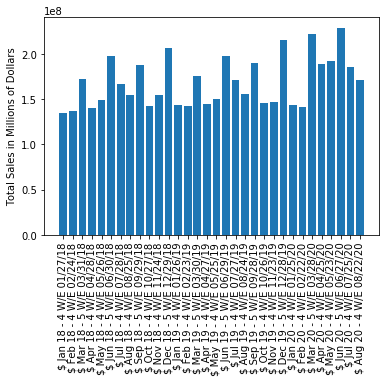

In [113]:
#Vodka Sales by Price 
vodka_dollar = [ x for x in vodka_for_sum.columns if x.startswith ("$") == True]
vodka_clean.columns.to_list()
vodka_filtered_dollar = vodka_for_sum.loc[:,
    ['Total US',
     'BC DEPARTMENT',
     'BC CATEGORY',
     'BC SUB CATEGORY',
     'BRAND OWNER HIGH',
     'BRAND HIGH',
     'BRAND FAMILY',
     'SHORT PRODUCT DESCRIPTION'] + vodka_dollar]
#week_1_dollar = vodka_for_sum["$ Jan 18 - 4 W/E 01/27/18"].sum()
#vodka_filtered_dollar
#week_1_dollar

monthly_dollar = pd.concat([pd.to_numeric(vodka_filtered_dollar[col], errors='coerce') for col in vodka_filtered_dollar], axis=1).sum()
monthly_dollar_df = pd.DataFrame(monthly_dollar)
monthly_dollar_df2 = monthly_dollar_df.drop(['Total US',
     'BC DEPARTMENT',
     'BC CATEGORY',
     'BC SUB CATEGORY',
     'BRAND OWNER HIGH',
     'BRAND HIGH',
     'BRAND FAMILY',
     'SHORT PRODUCT DESCRIPTION'])


monthly_dollar_df3 = monthly_dollar_df2.reset_index(drop=False)
monthly_dollar_df3
monthly_dollar_df4 = monthly_dollar_df3.rename(columns= {"index": "Month",
                                                     0: "Total Sales"})
#monthly_dollar_df4
x_value1 = monthly_dollar_df4["Month"]
y_value1 = monthly_dollar_df4["Total Sales"]

monthly_dollar_bar = plt.bar(x_value1, y_value1)
plt.xticks(x_value1, rotation="vertical")
plt.ylabel("Total Sales in Millions of Dollars")
monthly_dollar_bar

In [115]:
vodka_dollar_jan = [ x for x in vodka_clean.columns if x.endsswith ("18") == True]
#monthly_dollar_bar_data = vodka_filtered_dollar.loc["Sum of rows", "SHORT PRODUCT DESCRIPTION"]
vodka_dollar_jan_df = vodka_clean.loc[:,
    ['Total US',
     'BC DEPARTMENT',
     'BC CATEGORY',
     'BC SUB CATEGORY',
     'BRAND OWNER HIGH',
     'BRAND HIGH',
     'BRAND FAMILY',
     'SHORT PRODUCT DESCRIPTION'] + vodka_dollar_18]
vodka_dollar_jan_df
#monthly_dollar_bar_data 
#jan_dollar_bar = vodka_filtered_dollar.plot(kind='bar', x='Drug Regimen', y='Number of Mice', rot=90)

AttributeError: 'str' object has no attribute 'endsswith'

In [63]:
vodka_dollar_mar = [ x for x in vodka_clean.columns if x.startswith ("$ Mar") == True]
#monthly_dollar_bar_data = vodka_filtered_dollar.loc["Sum of rows", "SHORT PRODUCT DESCRIPTION"]
vodka_dollar_mar_df = vodka_clean.loc[:,
    ['Total US',
     'BC DEPARTMENT',
     'BC CATEGORY',
     'BC SUB CATEGORY',
     'BRAND OWNER HIGH',
     'BRAND HIGH',
     'BRAND FAMILY',
     'SHORT PRODUCT DESCRIPTION'] + vodka_dollar_mar]
vodka_dollar_mar_df

,Total US,BC DEPARTMENT,BC CATEGORY,BC SUB CATEGORY,BRAND OWNER HIGH,BRAND HIGH,BRAND FAMILY,SHORT PRODUCT DESCRIPTION,$ Mar 18 - 5 W/E 03/31/18,$ Mar 19 - 5 W/E 03/30/19,$ Mar 20 - 5 W/E 03/28/20
2,Total US xAOC,ALCOHOL,VODKA,VODKA,10 TORR,10 TORR,10 TORR,10 TR VDK 750 ML 085526000700,0,"2,243",513
3,Total US xAOC,ALCOHOL,VODKA,VODKA,10TH MOUNTAIN WHISKEY & SPIRIT CO,10TH MOUNTAIN,10TH MOUNTAIN,10TH MNT VDK 80 PRF 750 ML 086825000003,698,515,419
4,Total US xAOC,ALCOHOL,VODKA,VODKA,1220 ARTISAN SPIRITS,1220,1220,120 VDK 750 ML 004023227917,0,"1,184",844
5,Total US xAOC,ALCOHOL,VODKA,VODKA,1220 ARTISAN SPIRITS,1220,1220,120 VDK CHMM GNGR 750 ML 004023232812,0,462,999
6,Total US xAOC,ALCOHOL,VODKA,VODKA,1860S VODKA CO,1860S,1860S,1860 VDK 750 ML 009492226895,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4487,Total US xAOC,ALCOHOL,VODKA,VODKA,ZODIAC SPIRITS INC,ZODIAC,ZODIAC,ZDC VDK 80 PRF 1000 ML 065888700002,0,0,0
4488,Total US xAOC,ALCOHOL,VODKA,VODKA,ZODIAC SPIRITS INC,ZODIAC,ZODIAC,ZDC VDK 80 PRF 750 ML 065888700007,"12,458","6,934","4,617"
4489,Total US xAOC,ALCOHOL,VODKA,VODKA,ZODIAC SPIRITS INC,ZODIAC,ZODIAC,ZDC VDK BLCK CHRY 70 PRF 750 ML 065888700010,"3,037",478,"1,730"
4490,Total US xAOC,ALCOHOL,VODKA,VODKA,ZUBROWKA USA,ZU,ZU,ZU VDK BSN GRS 750 ML 073604053166,"5,574","5,005","2,726"


In [68]:
vodka_dollar_Apr = [ x for x in vodka_clean.columns if x.startswith ("$ Apr") == True]
#monthly_dollar_bar_data = vodka_filtered_dollar.loc["Sum of rows", "SHORT PRODUCT DESCRIPTION"]
vodka_dollar_Apr_df = vodka_clean.loc[:,
    ['Total US',
     'BC DEPARTMENT',
     'BC CATEGORY',
     'BC SUB CATEGORY',
     'BRAND OWNER HIGH',
     'BRAND HIGH',
     'BRAND FAMILY',
     'SHORT PRODUCT DESCRIPTION'] + vodka_dollar_Apr]
vodka_dollar_Apr_df["$ Apr 18 - 4 W/E 04/28/18"].median()


TypeError: could not convert string to float: '59,923'

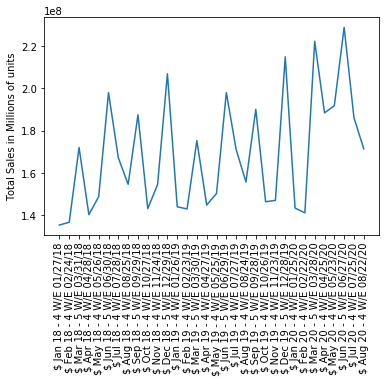

In [118]:
#Vodka Sales by Units

vodka_units = [ x for x in vodka_for_sum.columns if x.startswith ("$") == True]
vodka_clean.columns.to_list()
vodka_filtered_unit = vodka_for_sum.loc[:,
    ['Total US',
     'BC DEPARTMENT',
     'BC CATEGORY',
     'BC SUB CATEGORY',
     'BRAND OWNER HIGH',
     'BRAND HIGH',
     'BRAND FAMILY',
     'SHORT PRODUCT DESCRIPTION'] + vodka_units]

monthly_unit = pd.concat([pd.to_numeric(vodka_filtered_unit[col], errors='coerce') for col in vodka_filtered_unit], axis=1).sum()
monthly_unit_df = pd.DataFrame(monthly_unit)
monthly_unit_df2 = monthly_unit_df.drop(['Total US',
     'BC DEPARTMENT',
     'BC CATEGORY',
     'BC SUB CATEGORY',
     'BRAND OWNER HIGH',
     'BRAND HIGH',
     'BRAND FAMILY',
     'SHORT PRODUCT DESCRIPTION'])


monthly_unit_df3 = monthly_unit_df2.reset_index(drop=False)
monthly_unit_df3
monthly_unit_df4 = monthly_unit_df3.rename(columns= {"index": "Month",
                                                     0: "Total Sales"})
#monthly_unit_df4
x_value1 = monthly_unit_df4["Month"]
y_value1 = monthly_unit_df4["Total Sales"]

monthly_unit_line = plt.plot(x_value1, y_value1)
plt.xticks(x_value1, rotation="vertical")
plt.ylabel("Total Sales in Millions of Units")
monthly_unit_line

In [17]:
#Vodka Sales by Avg EQ Price
vodka_avg_price = [ x for x in vodka_clean.columns if x.startswith ("Avg EQ Price") == True]
#vodka_clean.columns.to_list()
vodka_filtered_avg_price = vodka_clean.loc[:,
    ['Total US',
     'BC DEPARTMENT',
     'BC CATEGORY',
     'BC SUB CATEGORY',
     'BRAND OWNER HIGH',
     'BRAND HIGH',
     'BRAND FAMILY',
     'SHORT PRODUCT DESCRIPTION'] + vodka_avg_price]
vodka_filtered_avg_price.head()

,Total US,BC DEPARTMENT,BC CATEGORY,BC SUB CATEGORY,BRAND OWNER HIGH,BRAND HIGH,BRAND FAMILY,SHORT PRODUCT DESCRIPTION,Avg EQ Price Jan 18 - 4 W/E 01/27/18,Avg EQ Price Feb 18 - 4 W/E 02/24/18,...,Avg EQ Price Nov 19 - 4 W/E 11/23/19,Avg EQ Price Dec 19 - 5 W/E 12/28/19,Avg EQ Price Jan 20 - 4 W/E 01/25/20,Avg EQ Price Feb 20 - 4 W/E 02/22/20,Avg EQ Price Mar 20 - 5 W/E 03/28/20,Avg EQ Price Apr 20 - 4 W/E 04/25/20,Avg EQ Price May 20 - 4 W/E 05/23/20,Avg EQ Price Jun 20 - 5 W/E 06/27/20,Avg EQ Price Jul 20 - 4 W/E 07/25/20,Avg EQ Price Aug 20 - 4 W/E 08/22/20
2,Total US xAOC,ALCOHOL,VODKA,VODKA,10 TORR,10 TORR,10 TORR,10 TR VDK 750 ML 085526000700,0,0,...,238,237.83,298.43,314.17,323.95,294.77,239.98,239.03,241.92,239.95
3,Total US xAOC,ALCOHOL,VODKA,VODKA,10TH MOUNTAIN WHISKEY & SPIRIT CO,10TH MOUNTAIN,10TH MOUNTAIN,10TH MNT VDK 80 PRF 750 ML 086825000003,430.66,431.09,...,425.36,423.52,407.2,421.16,418.72,388.25,401.12,383.45,431,367.87
4,Total US xAOC,ALCOHOL,VODKA,VODKA,1220 ARTISAN SPIRITS,1220,1220,120 VDK 750 ML 004023227917,0,0,...,248.05,247.79,258.87,245.34,230.39,244.72,239.67,247.81,259.97,241.22
5,Total US xAOC,ALCOHOL,VODKA,VODKA,1220 ARTISAN SPIRITS,1220,1220,120 VDK CHMM GNGR 750 ML 004023232812,0,0,...,251.62,265.88,204.88,270.51,243.73,276.01,284.81,265.45,244.69,221.92
6,Total US xAOC,ALCOHOL,VODKA,VODKA,1860S VODKA CO,1860S,1860S,1860 VDK 750 ML 009492226895,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Vodka Sales by %AVC
vodka_acv = [ x for x in vodka_clean.columns if x.startswith ("%ACV") == True]
#vodka_clean.columns.to_list()
vodka_filtered_acv = vodka_clean.loc[:,
    ['Total US',
     'BC DEPARTMENT',
     'BC CATEGORY',
     'BC SUB CATEGORY',
     'BRAND OWNER HIGH',
     'BRAND HIGH',
     'BRAND FAMILY',
     'SHORT PRODUCT DESCRIPTION'] + vodka_acv]
vodka_filtered_acv.head(10)

<bound method Series.sum of 2       1,742
3         118
4         637
5         150
6           0
        ...  
3581    3,204
3582    5,097
3583        0
3584        0
3585        0
Name: $ Jan 18 - 4 W/E 01/27/18, Length: 3584, dtype: object>

In [ ]:
bcc_df = pd.read_csv(bcc)
bcc_df.columns = bcc_df.iloc[0]
bcc_2 = bcc_df.drop([0, 1])
bcc_clean = bcc_2.set_index('Total US')
bcc_clean

In [ ]:
gw_df = pd.read_csv(gw)
gw_df.columns = gw_df.iloc[0]
gw_2 = gw_df.drop([0, 1])
gw_clean = gw_2.set_index('Total US')
gw_clean